# K-NearestNeighbor
* K-NN algorithm can be used for Regression as well as for classification but mostly it is used for the classification problems.
* K-NN is a non-parametric algorithm, whic means it does not make any assumption on underlying data.
* It is also claled a lazy learner algorithm.
* Working:
>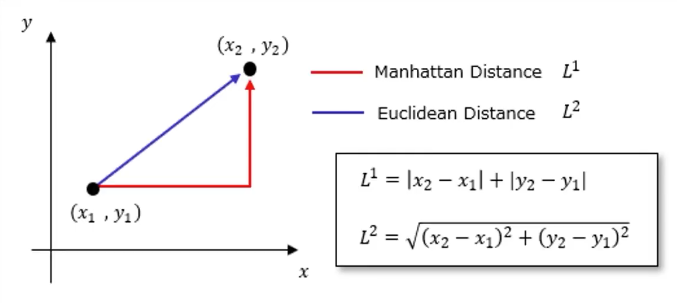


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv('../../dataset/Social_Network_Ads.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.drop(columns=['User ID','Gender'],inplace=True)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.rename(columns={'EstimatedSalary':'Salary'},inplace=True)

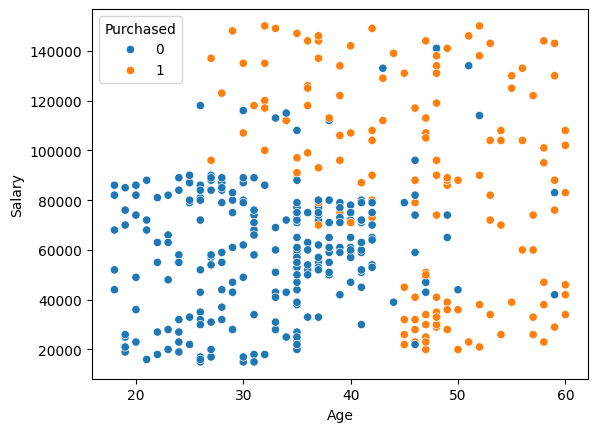

In [6]:
sns.scatterplot(x=df['Age'],y=df['Salary'],hue=df['Purchased'])
plt.show()

* now we are taking two different methods
* the first is contains original dataset
* and the second one contains standardized dataset


In [7]:
x = df.drop(columns=['Purchased'])
y = df['Purchased']

In [8]:
ss = StandardScaler()
ss_x = pd.DataFrame(ss.fit_transform(x),columns=x.columns)
ss_x.head()

,Age,Salary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [10]:
ss_x_train, ss_x_test, ss_y_train, ss_y_test = train_test_split(ss_x, y, test_size=0.25, random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
ss_knn = KNeighborsClassifier(n_neighbors=3)
ss_knn.fit(ss_x_train, ss_y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
print(knn.score(x_train,y_train),knn.score(x_test,y_test))
print(ss_knn.score(ss_x_train,ss_y_train),ss_knn.score(ss_x_test,ss_y_test))

0.8966666666666666 0.81
0.9266666666666666 0.92


e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


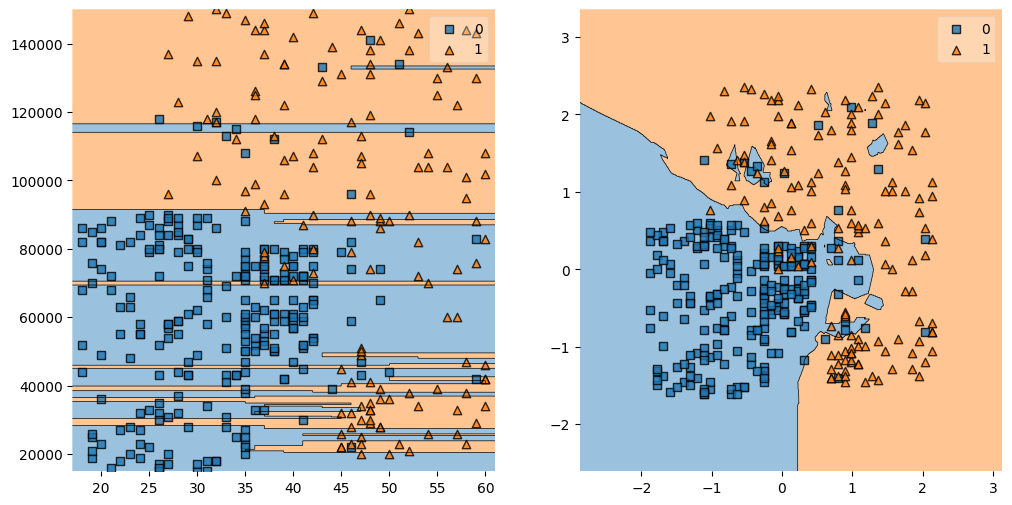

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn)
plt.subplot(1,2,2)
plot_decision_regions(ss_x.to_numpy(),y.to_numpy(),clf=ss_knn)
plt.show()